# Kaggle Titanic Project
Problem Statement:
Given PassengerId, Pclass, Name, Sex, Age, Parch, Ticket, Fare, Cabin, and Embarked, predict Survived or not.
Data Format:
PassengerId: 1, 2, ..., N :integer
Pclass: 1, 2, 3 : integer
Name: Last_Name, Title. First_Name_and_Other_Parts - comma and period separated : string : object
Sex: Male, Female : string : object
Age: nn.mm : float
SibSp: 0, 1, 2, ... : integer
Parch: 0, 1, 2, ... : integer
Ticket: string : object
Fare: xyz.mm : float
cabin: string : object
Embarked: character : object

We assume the data has been downloaded, processed and loaded as .pickle file. I have created two .pickle files:
train_all.pickle - contains all provided data split into train, valid and test subsets
train_sample.pickle - contains smaller subsets of the train_all.pickle for working on the software

We start our analysis by unpickling the data.


In [448]:
import os
import numpy as np
import pandas as pd
from six.moves import cPickle as pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DATA_ROOT = "./datasets"
CSV_FILENAME = "train.csv"
LABEL_LIST = ["Survived"]


##
path_to_data_dir = DATA_ROOT
csv_filename = CSV_FILENAME
csv_path = os.path.join(path_to_data_dir, csv_filename)
raw_data = pd.read_csv(csv_path)
raw_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [449]:
def randomize_data(data):
  
  """
  given a DataFrame with each row as one instance of data, returns a DataFrame that is randomized.
  """
  
  permutations = np.random.permutation(data.shape[0])
  shuffled_data = data.iloc[permutations, :]
  return shuffled_data


def load_data_as_DataFrame_from_csv_file(path_to_data_dir, csv_filename):
  csv_path = os.path.join(path_to_data_dir, csv_filename)
  return pd.read_csv(csv_path)


def create_train_valid_test_sets(data, test_size = 0.2, valid_size = 0.2):
  """
  Split the full data set into three subsets 
  Returns the DataFrames train, valid, test in that order 
  """
  
  train_set_full, test = train_test_split(data, test_size=test_size, random_state=42)
  train, valid = train_test_split(train_set_full, test_size=valid_size, random_state=42)
  
  return train, valid, test

def select_samples_from_full(df, cutoff_size = 1000):
  num_samples = df.shape[0]
  if num_samples > cutoff_size:
    sample_size = cutoff_size
  else:
    sample_size = df.shape[0]
  return sample_size

def separate_X_and_y(df, label_list):
  X = df[df.columns.difference(label_list)]
  y = df[label_list]
  return X, y

def generate_working_datasets(path_to_data_dir, csv_filename, label_list):

  data = load_data_as_DataFrame_from_csv_file(path_to_data_dir, csv_filename)
  randomized_data = randomize_data(data)

  train, valid, test = create_train_valid_test_sets(randomized_data, test_size = 0.2, valid_size = 0.2)
  
  sample_train_size = select_samples_from_full(train)
  sample_valid_size = select_samples_from_full(valid)
  sample_test_size = select_samples_from_full(test)
  
  sample_train = train.iloc[:sample_train_size, :]
  sample_valid = valid.iloc[:sample_valid_size, :]
  sample_test = test.iloc[:sample_test_size, :]
   
  # separate the X and y in each set
  
  X_train, y_train = separate_X_and_y(train, label_list)
  X_valid, y_valid = separate_X_and_y(valid, label_list)
  X_test, y_test = separate_X_and_y(test, label_list)
  X_sample_train, y_sample_train = separate_X_and_y(sample_train, label_list)
  X_sample_valid, y_sample_valid = separate_X_and_y(sample_valid, label_list)
  X_sample_test, y_sample_test = separate_X_and_y(sample_test, label_list)

# package for easier handling

  datasets_all = {
      "X_train" : X_train, "y_train" : y_train,
      "X_valid" : X_valid, "y_valid" : y_valid,
      "X_test" : X_test, "y_test" : y_test,
      }
  datasets_sample = {
      "X_sample_train" : X_sample_train, "y_sample_train" : y_sample_train,
      "X_sample_valid" : X_sample_valid, "y_sample_valid" : y_sample_valid,
      "X_sample_test" : X_sample_test, "y_sample_test" : y_sample_test,
      }
 
  return datasets_all, datasets_sample


def save_datasets(path_to_data_dir, csv_filename, datasets, is_sample = False):
  file_name_list = csv_filename.split('.')
  file_name_list_no_csv = file_name_list[0:-1]
  filename = ''.join(file_name_list_no_csv) # drope .csv
  if is_sample:
    filename_pickle = filename +'_samples'+ '.pickle'
  else:
    filename_pickle = filename +'_all'+ '.pickle'
  pickle_file = os.path.join(path_to_data_dir, filename_pickle)
#  print(pickle_file)
  try:
    with open(pickle_file, "wb") as f:
      print("\nSaving pickle file:", pickle_file)
      pickle.dump(datasets, f, pickle.HIGHEST_PROTOCOL)
  except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

## Call these function to separate data
label_list = LABEL_LIST
datasets_all, datasets_sample = generate_working_datasets(path_to_data_dir, csv_filename, label_list)
save_datasets(path_to_data_dir, csv_filename, datasets_all, is_sample = False)
save_datasets(path_to_data_dir, csv_filename, datasets_sample, is_sample = True)


Saving pickle file: ./datasets/train_all.pickle

Saving pickle file: ./datasets/train_samples.pickle


In [450]:
def load_pickle_data(path_to_pickle_file, is_sample = False):
  ''' A utility function to load pickle data'''
  with open(path_to_pickle_file, 'rb') as f:
    saved = pickle.load(f)
    if is_sample:
      X_train = saved["X_sample_train"]
      y_train = saved["y_sample_train"]
      X_valid = saved["X_sample_valid"]
      y_valid = saved["y_sample_valid"]
      X_test  = saved["X_sample_test"]
      y_test  = saved["y_sample_test"]
 
    else:
      X_train = saved["X_train"]
      y_train = saved["y_train"]
      X_valid = saved["X_valid"]
      y_valid = saved["y_valid"]
      X_test  = saved["X_test"]
      y_test  = saved["y_test"]
        
    del saved # will free up memory
    return X_train, y_train, X_valid, y_valid, X_test, y_test


## Load Data from appropriate pickle file
IS_SAMPLE = True
# FOR TITANIC DATA
PICKLE_FILE_ALL_DATA = "./datasets/train_all.pickle"
PICKLE_FILE_SAMPLE_DATA = "./datasets/train_samples.pickle"

#--------------------------Do not change below  
is_sample = IS_SAMPLE
if is_sample:  
  path_to_pickle_file = PICKLE_FILE_SAMPLE_DATA
else:
  path_to_pickle_file = PICKLE_FILE_ALL_DATA

load_pickle_data(path_to_pickle_file, is_sample)
X_train, y_train, X_valid, y_valid, X_test, y_test = load_pickle_data(path_to_pickle_file, is_sample)
## NOTE: THIS X_TEST IS NOT THE TEST DATA PROVIDED FOR THE PROJECT

## Observations on Data

In [451]:
X_train.head(2) ## check if loading worked

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
104,37.0,NaN,S,7.925,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276
40,40.0,NaN,S,9.475,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7546


In [452]:
X_train.dtypes  ## check the data types

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Ticket          object
dtype: object

### Index and PasssengerId are not same. We will just make note of this and not make index same as PassengerId
All that matters is that both X_train and y_train are using the same index values for the same passenger

#X_train = X_train.set_index("PassengerId") ##THIS WILL GO INTO THE DATA TRANSFORMATION PIPELINE


In [453]:
X_train.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
104,37.0,NaN,S,7.925,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276
40,40.0,NaN,S,9.475,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7546


In [454]:
y_train.head(2)

,Survived
104,0
40,0


###  WORK OUT RULES FOR HANDLING MISSING VALUES
#### Just to check which columns in X_train have missing values - this is just an exploration. BEWARE: We cannot look into the X_test, which mayhave a different set of missing columns that we will find in X_train. so, we need to have imputer that ADDRESS ALL COLUMNS, NOT JUST THE ONES WE CAN FIND IN THE X_TRAIN.

In [455]:
# lets look at NaN's in all data columns
for col in X_train:
    print( col, 100*sum(pd.isnull(X_train[col]))/X_train.shape[0], '%' )

Age 20.0351493849 %
Cabin 78.0316344464 %
Embarked 0.0 %
Fare 0.0 %
Name 0.0 %
Parch 0.0 %
PassengerId 0.0 %
Pclass 0.0 %
Sex 0.0 %
SibSp 0.0 %
Ticket 0.0 %


In [456]:
# Based on fraction of NaN's in Cabin, we will drop Cabin ## Will be handled by pipeline
# While we are at it, we should check out these for raw_data - the original DataFrame
raw_data.shape

(891, 12)

In [457]:
print("NANs in the full train data:")
for col in raw_data:
    df = raw_data
    print( col, 100*sum(pd.isnull(df[col]))/df.shape[0], '%' )

NANs in the full train data:
PassengerId 0.0 %
Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 19.8653198653 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 77.1043771044 %
Embarked 0.224466891134 %


### ORDER OF OUR WORK
#### MISSING VALUES IN CABIN
#### MISSING VALUES IN EMBARK
#### MISSING VALUES IN AGE
-----------------------------------------------------------------------
AFTER THESE EXPLORATIONS, I WILL WRITE AN IMPUTER CLASS THAT WE CAN USE IN A PIPELINE AND TRANSFORM ALL DATASETS.

#### MISSING VALUES IN CABIN
THERE ARE TOO MANY MISSING VALUES IN CABIN. ONE SIMPLE STRATEGY WILL BE TO JUST DELETE THEM, BUT THAT WOULD MEAN LOSING INFORMATION CONTAINED IN OTHER VARIABLES THAT CORRESPOND TO THAT ROW. THIS IS USUALLY NOT AN OPTIMAL SOLUTION. WE CAN REPLACE THE NANS IN CABIN NY LETTER U. I ALSO NOTICED THAT CABIN NAMES HAVE A LETTER AND SOME NUMBERS. WE WILL AGGREGATE THEM INTO JUST LETTERS, OTHERWISE THERE WILL BE TOO MANY CATEGORIES ARIZING FROM CABIN COLUMN.

In [458]:
### We will replace NaN in cabin by letter U and other cabins will a single letter
def fill_cabin_name_NaN_by_letter (df, Cabin):

    df[[Cabin]] = df[[Cabin]].fillna(value='U')

fill_cabin_name_NaN_by_letter (X_train, 'Cabin')

In [459]:
X_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
104,37.0,U,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276
40,40.0,U,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7546
852,9.0,U,C,15.2458,"Boulos, Miss. Nourelain",1,853,3,female,1,2678
86,16.0,U,S,34.3750,"Ford, Mr. William Neal",3,87,3,male,1,W./C. 6608
147,9.0,U,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,W./C. 6608
719,33.0,U,S,7.7750,"Johnson, Mr. Malkolm Joackim",0,720,3,male,0,347062
116,70.5,U,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,370369
253,30.0,U,S,16.1000,"Lobb, Mr. William Arthur",0,254,3,male,1,A/5. 3336
433,17.0,U,S,7.1250,"Kallio, Mr. Nikolai Erland",0,434,3,male,0,STON/O 2. 3101274
583,36.0,A10,C,40.1250,"Ross, Mr. John Hugo",0,584,1,male,0,13049


In [460]:
#def process_cabin (df):  # This JUST PUTS THE TWO FUNCTIONS ABOVE INTO ONE - I SHOULDN'T USE IT THOUGH
#    fill_cabin_name_NaN_by_letter (df, 'Cabin')
#    replace_cabin_name_by_single_letter(df, 'Cabin')
#process_cabin (X_train)

### MISSING VALUES IN EMBARKED
Next we will look at Embarked - replace the NaNs here by the most common one since so few are missing and this is as good a guess as any

In [461]:
def process_embarked(df, column = 'Embarked'):  # This is the one that should go into data transformation ***********
    ''' replace_NaN_in_Embarked_by_most_common '''
    embarkation_counts = X_train['Embarked'].value_counts()
    most_common = embarkation_counts.index[0]
    df[[column]] = df[[column]].fillna(value=most_common)
print( X_train[pd.isnull(X_train['Embarked']) ] )
print( X_train['Embarked'].value_counts() )
process_embarked(X_train, column = 'Embarked')
#print(X_train.loc[61,:])  # must use .loc here since iloc is not what 61 and 829 are!
#print(X_train.loc[829,:])

Empty DataFrame
Columns: [Age, Cabin, Embarked, Fare, Name, Parch, PassengerId, Pclass, Sex, SibSp, Ticket]
Index: []
S    403
C    112
Q     54
Name: Embarked, dtype: int64


### MISSING VALUES IN AGE
We could just replace the missing values in Age by the median of Age column. But, here we can actually do better if we make use of the Title in the given names and coarse-grain the Age into reasonable bins.
Age-group : Age
Baby  : 0 - 2
Child : 2 - 10
Young_adult : 10 - 18
Adult : 18-50
Old : 50 : 65
Very_old : 65+
If Title is Master or Miss use median of categories Baby, Child and Young_adult.
For other Titles use median of the rest.
Therefore, we will need to extract titles


#### DEALING WITH MISSING AGE BY SIMPLE REPLACEMENT BY MEDIAN
THERE IS ALREADY A READY-MADE IMPUTER IN SKLEARN.PREPROCESSING.

In [462]:
from sklearn.preprocessing import Imputer
imputer_for_age = Imputer(strategy = 'median')  ## This needs numerical columns
the_ages = X_train[['Age']]
col_name_age = list( the_ages.columns )
the_ages.head(10)

,Age
104,37.0
40,40.0
852,9.0
86,16.0
147,9.0
719,33.0
116,70.5
253,30.0
433,17.0
583,36.0


In [463]:
imputer_for_age.fit(the_ages)
the_age_column = pd.DataFrame( imputer_for_age.transform(the_ages) )
the_age_column.columns = col_name_age
the_age_column.index = the_ages.index
the_age_column.head(10)

,Age
104,37.0
40,40.0
852,9.0
86,16.0
147,9.0
719,33.0
116,70.5
253,30.0
433,17.0
583,36.0



#### IMPROVING MISSING AGES WITH MORE COMPLICATED RULES - TO BE ATTEMPTED IN THE FUTURE
#### EXTRACT TITLE INFORMATION IN NAMES
(1) IF PASSENGER HAS TITLE MASTER OR MISS, THEN REPLACE NAN BY MEDIAN OF PASSENGERS IN AGE RANGE 0-18
(2) OTHERWISE REPLACE THE AGE BY MEDIAN OF AGES 18 +

In [464]:
## TO CALCULATE THE MEDIANS NEEDED
the_age_series = X_train['Age']

In [465]:
the_age_series.head()

104    37.0
40     40.0
852     9.0
86     16.0
147     9.0
Name: Age, dtype: float64

In [466]:
low_age = the_age_series[ the_age_series < 18]

In [467]:
high_age = the_age_series[ the_age_series >= 18 ]

In [468]:
LOW_AGE_MEDIAN = low_age.median() # MUST REMEMBER THIS NUMBER WHICH WILL BE USED WITH THE TEST SET
HIGH_AGE_MEDIAN = high_age.median()
print('LOW_AGE_MEDIAN ', LOW_AGE_MEDIAN, 'HIGH_AGE_MEDIAN = ', HIGH_AGE_MEDIAN)

LOW_AGE_MEDIAN  9.0 HIGH_AGE_MEDIAN =  31.0


In [469]:
def find_median_ages_for_impputation(X_train):
    the_age_series = X_train['Age']
    low_age = the_age_series[ the_age_series < 18]
    high_age = the_age_series[ the_age_series >= 18 ]
    low_age_median = low_age.median() # MUST REMEMBER THIS NUMBER WHICH WILL BE USED WITH THE TEST SET
    high_age_median = high_age.median()
    return low_age_median, high_age_median
low_age_median, high_age_median = find_median_ages_for_impputation(X_train)
print('low_age_median = ', low_age_median, 'high_age_median = ', high_age_median)

low_age_median =  9.0 high_age_median =  31.0


In [470]:
## WE have to write our own imputer Class

# TODO write imputer class
    

## SOME DATA TRANSFORMATION IDEAS TO EXPLORE

### AGGREGATE CABIN INTO SINGLE LETTER CATEGORIES
FOR INSTANCE CABIN C123 AND C45 WILL BOTH BE IN CATEGORY CABIN C. WE HAVE ALREADY WORKED ON THIS IN THE ABOVE AND NOW I WANT TO MOVE THOSE CODES HERE FOR ORGANIZATION PURPOSES.

In [471]:
def replace_cabin_name_by_single_letter(df, Cabin):    ## THIS FUNCTION SHOULD GO INTO TRANSFORMER NOT IN IMPUTER
    # mapping each Cabin value with the cabin letter
    df['Cabin'] = df['Cabin'].map(lambda c : c[0])
replace_cabin_name_by_single_letter(X_train, 'Cabin')
X_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
104,37.0,U,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276
40,40.0,U,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7546
852,9.0,U,C,15.2458,"Boulos, Miss. Nourelain",1,853,3,female,1,2678
86,16.0,U,S,34.3750,"Ford, Mr. William Neal",3,87,3,male,1,W./C. 6608
147,9.0,U,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,W./C. 6608
719,33.0,U,S,7.7750,"Johnson, Mr. Malkolm Joackim",0,720,3,male,0,347062
116,70.5,U,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,370369
253,30.0,U,S,16.1000,"Lobb, Mr. William Arthur",0,254,3,male,1,A/5. 3336
433,17.0,U,S,7.1250,"Kallio, Mr. Nikolai Erland",0,434,3,male,0,STON/O 2. 3101274
583,36.0,A,C,40.1250,"Ross, Mr. John Hugo",0,584,1,male,0,13049


In [472]:
X_train['Cabin'].value_counts()

U    444
C     41
B     29
D     20
E     18
F      9
A      7
T      1
Name: Cabin, dtype: int64

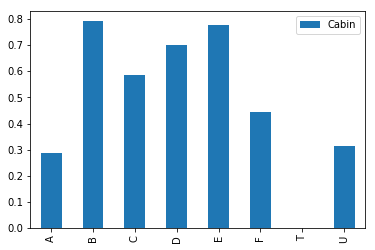

In [499]:
### Lets see if there is any pattern to the survival based on cabin category
def survived_by_cabin (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_cabin = X_copy['Cabin'].value_counts()
    survived_by_cabin = X_copy[X_copy['Survived'] == 1]['Cabin'].value_counts()
    frac_surv_by_cabin = (1.0*survived_by_cabin)/counts_by_cabin
    return frac_surv_by_cabin
d = pd.DataFrame( survived_by_cabin(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Looks like Cabin letter is also a good indicator - If you are U or T or A you have much less chance
## If you are B, C, D, E, you have way better chance

### EXTRACT TITLE FROM NAME
While we are at it we can extract several titles

Master
Mr
Miss
Mrs
Professional for Dr and Rev
Military for Maj, Cap, Col, Sgt,...
Nobility for Hon, Count, Countess, Don

We will get all the titles by value_counts()

In [473]:
def extract_titles_1 (df1, column = 'Name'):
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    title_counts = df['Title'].value_counts()
    return title_counts
extract_titles_1 (raw_data)

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Capt              1
Ms                1
Mme               1
Don               1
the Countess      1
Lady              1
Sir               1
Name: Title, dtype: int64

In [474]:
## Keep dictionary of titles
title_dict = {
    'Mr' : 'Mr',
    'Miss' : 'Miss',
    'Mrs' : 'Mrs', 'Ms' : 'Mrs',
    'Master' : 'Master',
    'Dr' : 'Professional',  'Rev' : 'Professional',
    'Col' : 'Military', 'Maj' : 'Military', 'Capt' : 'Military',
    'Lady' : 'Nobility', 'Sir' : 'Nobility', 'Mlle' : 'Nobility', 'Mme' : 'Nobility',
    'Don' : 'Nobility', 'the Countess' : 'Nobility', 'Jonkheer'  : 'Nobility',
}

In [475]:
def extract_titles_2 (df1, column = 'Name'):
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    df['Title'] = df['Title'].map(title_dict)
    title_counts = df['Title'].value_counts()
    return title_counts
print("Title counts in raw_data")
extract_titles_2 (raw_data)


Title counts in raw_data


Mr              517
Miss            182
Mrs             126
Master           40
Professional     13
Nobility          8
Military          3
Name: Title, dtype: int64

In [476]:
def extract_titles (df1, column = 'Name'):  #### THIS IS WHAT WE WANT IN THE FINAL TRANSFORMATION
    df = df1.copy()
    df['Title'] = df[column].map( lambda name: name.split(',')[1].split('.')[0].strip() )
    df['Title'] = df['Title'].map(title_dict)
#    title_counts = df['Title'].value_counts()
    return df
X_train = extract_titles (X_train)
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title
104,37.0,U,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276,Mr
40,40.0,U,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7546,Mrs
852,9.0,U,C,15.2458,"Boulos, Miss. Nourelain",1,853,3,female,1,2678,Miss
86,16.0,U,S,34.3750,"Ford, Mr. William Neal",3,87,3,male,1,W./C. 6608,Mr
147,9.0,U,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,W./C. 6608,Miss


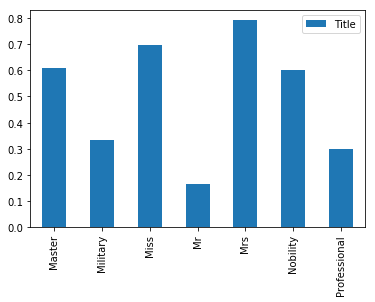

In [498]:
## Lets visualize to see if this rerived feature will be effective
def survived_by_title (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_title = X_copy['Title'].value_counts()
    survived_by_title = X_copy[X_copy['Survived'] == 1]['Title'].value_counts()
    frac_surv_by_title = (1.0*survived_by_title)/counts_by_title
    return frac_surv_by_title
d = pd.DataFrame( survived_by_title(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Apears to be a good categorizer - has distinct reaction: If you are Mr or Milaitary or Professional, you are doomed
## If you are a Master or Miss or Mrs or Nobility you have way better chance

### HOW ARE AGES DISTRIBUTED? SHOULD WE BIN AGES TO CAPTURE EFFECT BASED ON AGE_GROUPS?
THE RESULT BELOW SHOWS THAT AGGREGATING MASTER AND MISS WOULD NOT CAPTURE YOUNG CHILDREN AS A SEPARATE GROUP

In [477]:
X_train.groupby('Title')['Age'].median()

Title
Master           3.0
Military        60.0
Miss            21.0
Mr              30.0
Mrs             35.0
Nobility        33.0
Professional    49.5
Name: Age, dtype: float64

#### AGGREGATING BY AGE GROUPS

In [478]:
def add_age_group(df):
    df_cp = df.copy()
    age_groups = ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old']
    age_bins = [0, 2, 10, 18, 55, 70, 120]
    df_cp['Age_Group'] = pd.cut(df_cp.Age, age_bins, right=False, labels=age_groups)
    return df_cp

X_train = add_age_group(X_train)

In [479]:
#X_train = X_train.drop('Age_Group', axis = 1)
X_train.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,Age_Group
104,37.0,U,S,7.925,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3101276,Mr,Adult


In [480]:
age_medians = X_train.groupby('Age_Group')['Age'].median()
age_medians.__class__

pandas.core.series.Series

In [481]:
age_medians['Baby']

0.95999999999999996

In [482]:
age_medians

Age_Group
Baby         0.96
Child        4.00
Young       16.00
Adult       30.00
Old         60.00
Very_Old    70.50
Name: Age, dtype: float64

In [483]:
X_train['Age_Group'].value_counts()

Adult       355
Young        34
Child        28
Old          21
Baby         12
Very_Old      5
Name: Age_Group, dtype: int64

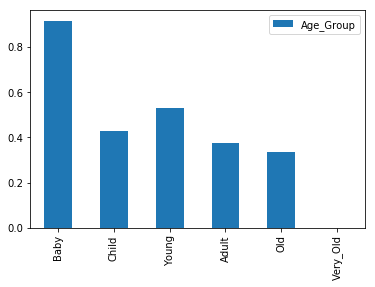

In [496]:
## LETS VISUALIZE THE SURVIVAL BY AGE GROUPS
def survived_by_age (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_age = X_copy['Age_Group'].value_counts()
    survived_by_age = X_copy[X_copy['Survived'] == 1]['Age_Group'].value_counts()
    frac_surv_by_age = (1.0*survived_by_age)/counts_by_age
    return frac_surv_by_age
d = pd.DataFrame( survived_by_age(X_train,y_train) )
d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
plt.show()
## Wow, no very old people survived and very high percentage of babies survived!!!
## This age_group will be a significant derived feature

### AGGREGATE TICKETS INTO SINGLE LETTER CATEGORIES
MAYBE JUST LIKE CABIN, THERE IS SOME ORDER TO THE TICKET NUMBERING

In [500]:
def replace_ticket_name_by_single_letter(df, Ticket):    ## THIS FUNCTION SHOULD GO INTO TRANSFORMER NOT IN IMPUTER
    # mapping each Cabin value with the cabin letter
    df['Ticket'] = df['Ticket'].map(lambda t : t[0])
replace_ticket_name_by_single_letter(X_train, 'Ticket')
X_train.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,Age_Group,Survived
104,37.0,U,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3,Mr,Adult,0
40,40.0,U,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7,Mrs,Adult,0
852,9.0,U,C,15.2458,"Boulos, Miss. Nourelain",1,853,3,female,1,2,Miss,Child,0
86,16.0,U,S,34.3750,"Ford, Mr. William Neal",3,87,3,male,1,W,Mr,Young,0
147,9.0,U,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,W,Miss,Child,0
719,33.0,U,S,7.7750,"Johnson, Mr. Malkolm Joackim",0,720,3,male,0,3,Mr,Adult,0
116,70.5,U,Q,7.7500,"Connors, Mr. Patrick",0,117,3,male,0,3,Mr,Very_Old,0
253,30.0,U,S,16.1000,"Lobb, Mr. William Arthur",0,254,3,male,1,A,Mr,Adult,0
433,17.0,U,S,7.1250,"Kallio, Mr. Nikolai Erland",0,434,3,male,0,S,Mr,Young,0
583,36.0,A,C,40.1250,"Ross, Mr. John Hugo",0,584,1,male,0,1,Mr,Adult,0


In [501]:
X_train['Ticket'].value_counts()

3    188
2    122
1     84
S     49
P     43
C     27
A     15
W      9
4      8
7      6
6      5
F      5
L      3
5      2
8      2
9      1
Name: Ticket, dtype: int64

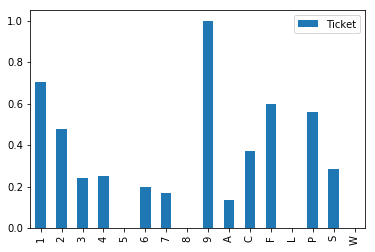

In [503]:
### Lets see if there is any pattern to the survival based on cabin category
def survived_by_ticket (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_ticket = X_copy['Ticket'].value_counts()
    survived_by_ticket = X_copy[X_copy['Survived'] == 1]['Ticket'].value_counts()
    frac_surv_by_ticket = (1.0*survived_by_ticket)/counts_by_ticket
    return frac_surv_by_ticket
d = pd.DataFrame( survived_by_ticket(X_train,y_train) )
#d.loc[ ['Baby', 'Child', 'Young', 'Adult', 'Old', 'Very_Old'] ].plot(kind='bar')
d.plot(kind='bar')
plt.show()
## Boy, if you were W, L, A, 5, 6, 7, 8 - you will be most likely dead
## 1, 9, F, P - survived well 
## Looks like aggregating tickets is helpful

### SHOULD WE COMBINE PARCH AND SIBSP INTO A FAMILY CATEGORY? MAYBE, FAMILIES SURVIVE TOGETHER OR PERISH TOGETHER


In [510]:
def add_family(df):   
    df1 = df.copy()
    df1['Family'] = df1['Parch'] + df1['SibSp']
    return df1
X_train = add_family(X_train)
X_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,Age_Group,Survived,Family
104,37.0,U,S,7.9250,"Gustafsson, Mr. Anders Vilhelm",0,105,3,male,2,3,Mr,Adult,0,2
40,40.0,U,S,9.4750,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0,41,3,female,1,7,Mrs,Adult,0,1
852,9.0,U,C,15.2458,"Boulos, Miss. Nourelain",1,853,3,female,1,2,Miss,Child,0,2
86,16.0,U,S,34.3750,"Ford, Mr. William Neal",3,87,3,male,1,W,Mr,Young,0,4
147,9.0,U,S,34.3750,"Ford, Miss. Robina Maggie ""Ruby""",2,148,3,female,2,W,Miss,Child,0,4


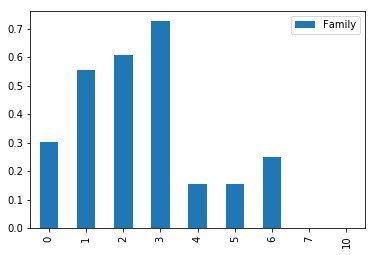

In [511]:
## Lets display to see if this makes a difference
def survived_by_family (X,y):
    X_copy = X
    X_copy[list(y.columns)] = y
    counts_by_family = X_copy['Family'].value_counts()
    survived_by_family = X_copy[X_copy['Survived'] == 1]['Family'].value_counts()
    frac_surv_by_family = (1.0*survived_by_family)/counts_by_family
    return frac_surv_by_family
d = pd.DataFrame( survived_by_family(X_train,y_train) )
d.plot(kind='bar')
plt.show()

### WHAT TO DO WITH FARES? 
MAYBE LEAVE IT THERE AS A FLOAT VARIABLE - IT IS PROBABLY REDUNDANT SINCE THE INFORMATION ABOUT FARE IS WELL-AGGREGATED IN PCLASS

## SUMMARY OF TRANSFORMATIONS TO BE PERFORMED ON DATA - USING PIPELINE
#### IMPUTE:
##### FILL NAN IN ALL FLOAT VARIABLES BY MEDIAN - AGE AND FARE THE ONLY FLOAT VARIABLES
##### FILL NAN IN CABIN BY LETTER U
##### TYPE-CAST DTYPE OF ALL CATEGORIES TO OBJECTS
##### FILL NAN IN OBJECTS BY MODES IN EACH CASE
#### DERIVED VARIABLES: 
##### COVERT CABIN TO SINGLE CHARACTER CATEGORIES
##### EXTRACT AND ADD A NEW TITLE COLUMN
##### ADD AGE_GROUP COLUMN
##### CONVERT TICKET TO SINGLE CHANRATER CATEGORIES
##### ADD FAMILY CATEGORY
### WRITE TRANSFORMATIONS IN THE SPIRIT OF SKLEARN DEISGN PRINCIPLES
### START WITH FRESH COPY OF X_TRAIN, X_VALID, X_TEST AND APPLY THESE TRANSFORMATIONS

In [512]:
IS_SAMPLE = False
is_sample = IS_SAMPLE
if is_sample:  
  path_to_pickle_file = PICKLE_FILE_SAMPLE_DATA
else:
  path_to_pickle_file = PICKLE_FILE_ALL_DATA

load_pickle_data(path_to_pickle_file, is_sample)
X_train, y_train, X_valid, y_valid, X_test, y_test = load_pickle_data(path_to_pickle_file, is_sample)
## NOTE: THIS X_TEST IS NOT THE TEST DATA PROVIDED FOR THE PROJECT